# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [4]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/home/tars/UIUC-Computational-Photography/Project_1/hybrid/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: '/home/tars/UIUC-Computational-Photography/Project_1/hybrid/utils.py' and './utils.py' are the same file


In [5]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
# %matplotlib notebook  
import matplotlib.pyplot as plt

In [6]:
from PIL import Image

def see_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size

        print(f"Image size: {width}x{height} pixels")

def resize_image(image_path,name):
    with Image.open(image_path) as img:
        # Define new dimensions (e.g., 800x600 pixels)
        new_size = (800, 600)
        resized_img = img.resize(new_size)
    
        # Save the resized image
        resized_img.save(f'{name}.jpg')
        print(f"Image resized and saved as '{name}'")

see_image_size('./syd.JPG')
see_image_size('./reed.JPG')
see_image_size('./moonie.JPG')
see_image_size('./ozzie.JPG')
see_image_size('./enhance_color.JPG')
see_image_size('./fix_contrast.JPG')
see_image_size('./color_shift.JPG')

resize_image('./syd.JPG','syd_resized')
resize_image('./reed.JPG','reed_resized')
resize_image('./moonie.JPG','moonie_resized')
resize_image('./ozzie.JPG','ozzie_resized')
resize_image('./enhance_color.JPG','enhance_color_resized')
resize_image('./fix_contrast.JPG','fix_contrast_resized')
resize_image('./color_shift.JPG','color_shift_resized')

Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image size: 6000x4000 pixels
Image resized and saved as 'syd_resized'
Image resized and saved as 'reed_resized'
Image resized and saved as 'moonie_resized'
Image resized and saved as 'ozzie_resized'
Image resized and saved as 'enhance_color_resized'
Image resized and saved as 'fix_contrast_resized'
Image resized and saved as 'color_shift_resized'


In [7]:
datadir = './'

im1_file = datadir + 'reed_resized.jpg'
im2_file = datadir + 'syd_resized.jpg'
im3_file = datadir + 'ozzie_resized.jpg'
im4_file = datadir + 'moonie_resized.jpg'
shift = datadir + 'color_shift_resized.jpg'
enhance = datadir + 'enhance_color_resized.jpg'
contrast = datadir + 'fix_contrast_resized.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im3 = np.float32(cv2.imread(im3_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im4 = np.float32(cv2.imread(im4_file, cv2.IMREAD_GRAYSCALE) / 255.0)
shift = np.float32(cv2.imread(shift, cv2.IMREAD_COLOR) / 255.0)
enhance = np.float32(cv2.imread(enhance, cv2.IMREAD_COLOR) / 255.0)
contrast = np.float32(cv2.imread(contrast, cv2.IMREAD_GRAYSCALE) / 255.0)

https://programminghead.com/Projects/find-coordinates-of-image-online.html

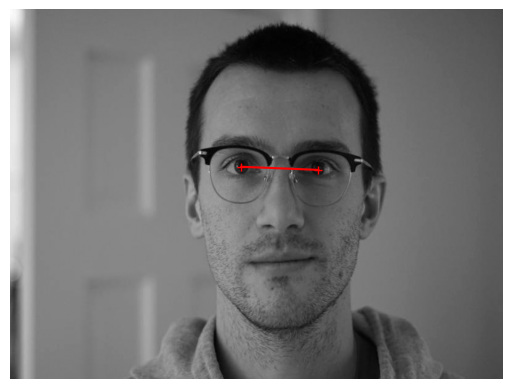

In [5]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[375, 255], [500, 260]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

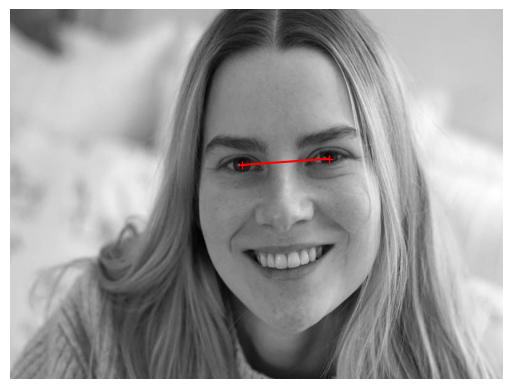

In [6]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[376,252], [517,242]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [7]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [8]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

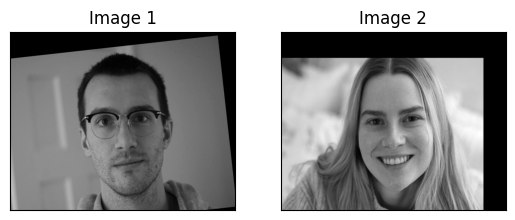

In [9]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

#### Using the Gaussian (low-pass) Filter

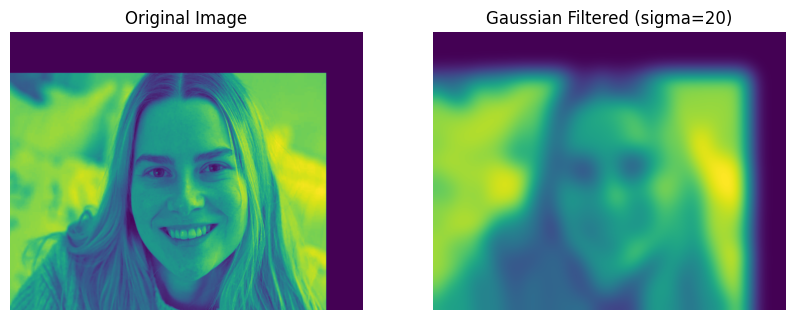

In [10]:
from scipy.ndimage import gaussian_filter

sigma = 20
im2_filtered = gaussian_filter(im2, sigma=sigma)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(im2)
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(im2_filtered)
plt.title(f'Gaussian Filtered (sigma={sigma})')
plt.axis('off')

plt.show()

#### Using the Impulse Filter Minus the Gaussian Filter (high-pass)

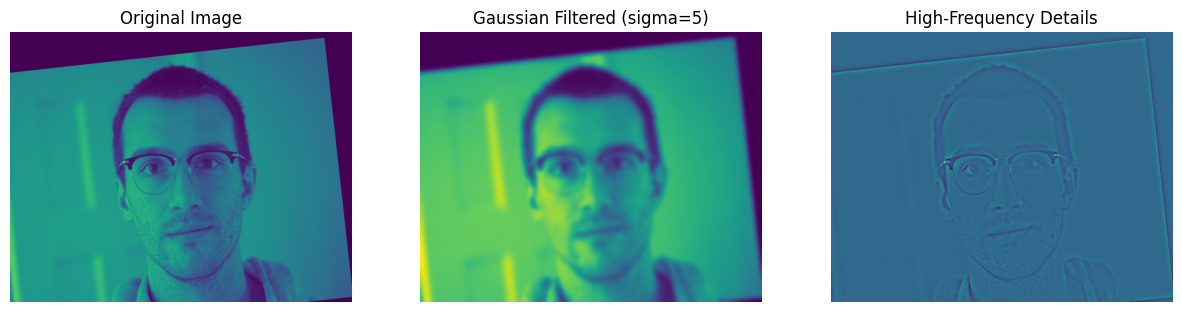

In [11]:
import matplotlib.image as mpimg

# Apply Gaussian filter
sigma = 5
im1_filtered = gaussian_filter(im1, sigma=sigma)

# Compute the impulse filter minus Gaussian filter
im1_high_freq = im1 - im1_filtered
# Display the results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(im1)
plt.title('Original Image')
plt.axis('off')

# Gaussian-filtered image
plt.subplot(1, 3, 2)
plt.imshow(im1_filtered)
plt.title(f'Gaussian Filtered (sigma={sigma})')
plt.axis('off')

# High-frequency details (impulse filter minus Gaussian filter)
plt.subplot(1, 3, 3)
plt.imshow(im1_high_freq)
plt.title('High-Frequency Details')
plt.axis('off')

plt.show()

In [12]:
def display_frequency_image(frequency_image):
    '''
    frequency_image: H x W floating point numpy ndarray representing image after FFT

    in grayscale

    '''
    shifted_image = np.fft.fftshift(frequency_image)
    amplitude_image = np.abs(shifted_image)
    log_amplitude_image = np.log(amplitude_image)
    fig = plt.figure()
    plt.imshow(log_amplitude_image, cmap='gray')
    plt.show()
# credit: lectures from Dr. Hoeim

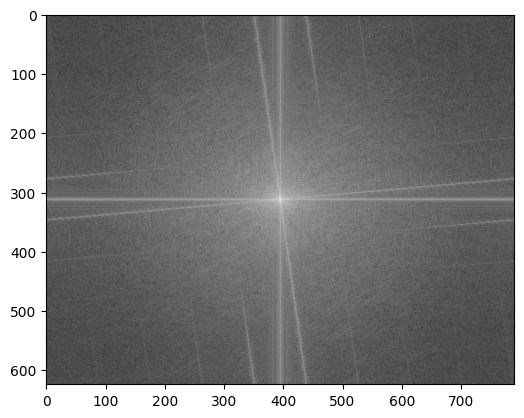

In [13]:
# input
display_frequency_image(np.fft.fft2(im1))

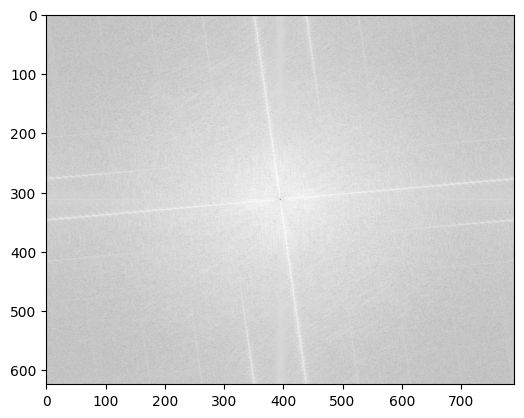

In [14]:
# filtered
display_frequency_image(np.fft.fft2(im1_high_freq))

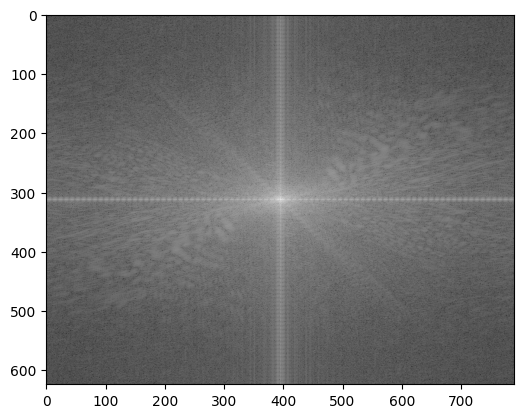

In [15]:
# input
display_frequency_image(np.fft.fft2(im2))

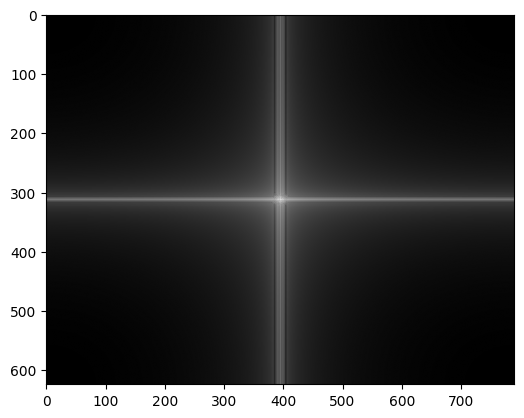

In [16]:
display_frequency_image(np.fft.fft2(im2_filtered))

Clearly, you can see that both images differ a bit in terms of frequencies. They both have fairly bright spots in the center, representing lower frequencies across the image. While the image of me contains almost no frequency variation apart from the center, you do see spikes in the vertical and horizontal directions. My best guess for this is due to the edges seen in the image of me in those directions. My hairline shows a farily straight set of lines going up and across, as do my glasses, eyebrows, and general face shape. As for my fiancé, her FFT shows much of the same, except we do not see as much change in frequency across the horizontal axis. I think this is because of the proximity of Sydney to the camera. There is just less change because more uniform aspects of her face take up the shot from left to right. It is still there though, maybe overshadowed by the pattern seen throughout the FFT on both sides of the vertical line. I think this is probably due to the general way the log fft magnitude plot looks, as I see similar sorts of objects in Dr. Hoeim's examples in the lectures that are colored. In the second fft, we also see a diagonal line going from top left to bottom right. This would suggest that we are getting lots of changes in frequency when moving across this direction in the image. It is not a super strong line, but it would make sense as to why that line appears and the opposite does not (from top right to bottom left). Sydney's shoulder takes up space in the bottom left, therefore reducing the amount of change in frequency we see overall when moving in that direction to the top right. 

In [9]:
from scipy.ndimage import gaussian_filter

def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  
    # first, apply the Gaussian filter to im1
    im1_filtered = gaussian_filter(im1, sigma=sigma_low)

    # then, get the high pass of im2
    im2_filtered = gaussian_filter(im2, sigma=sigma_high)
    im2_high_freq = im2 - im2_filtered

    return im1_filtered + im2_high_freq


In [18]:
sigma_low = 17 # choose parameters that work for your images (20 for the low and 5 for the high seem good)
sigma_high = 5

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


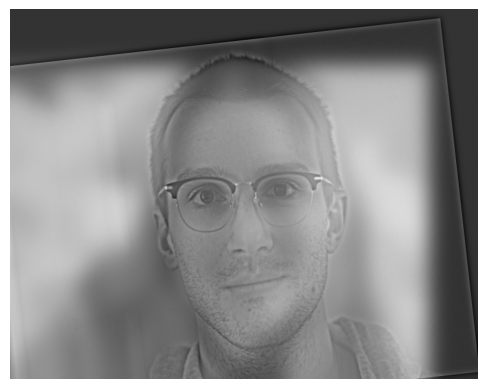

In [19]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

So this makes sense. Up close you see my face (detailed image) but as we get farther away, human vision loses these details, and we just see the blurred image (my fiancé's face). Let's do our two other hybrid images now.

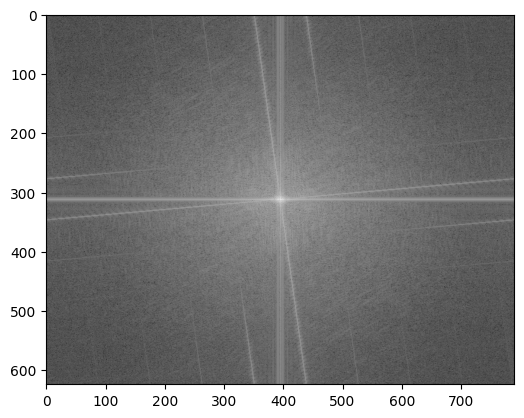

In [20]:
display_frequency_image(np.fft.fft2(im_hybrid))

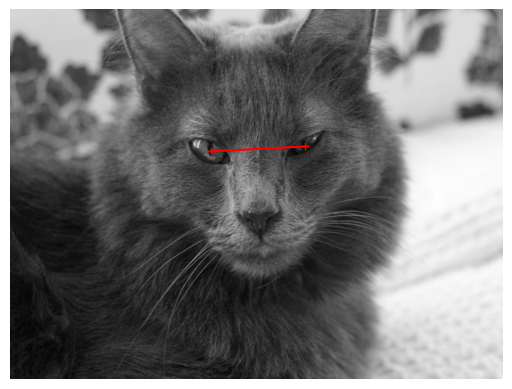

In [21]:
pts_im3 = utils.prompt_eye_selection(im3)
pts_im3 = np.array([[325, 230], [478, 222]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im3[:,0], pts_im3[:,1], 'r-+')

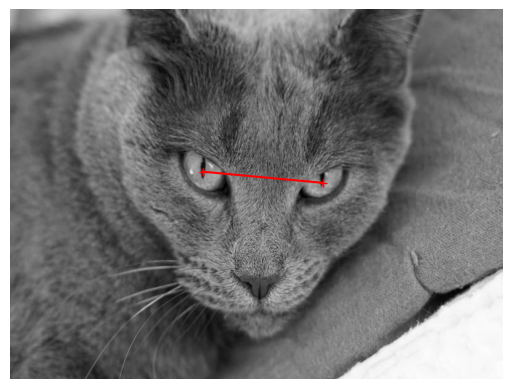

In [22]:
pts_im4 = utils.prompt_eye_selection(im4)
pts_im4 = np.array([[313, 263], [507, 281]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im4[:,0], pts_im4[:,1], 'r-+')

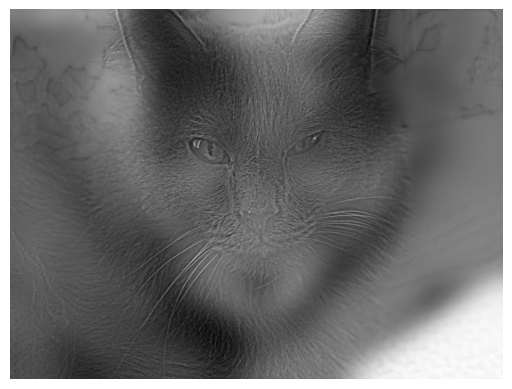

In [23]:
sigma_low = 20
sigma_high = 3

im_hybrid = hybridImage(im4, im3, sigma_low, sigma_high)
cropped_object = utils.interactive_crop(im_hybrid)

Great! Standing about 10 feet away I see Moondancer, while right next to my screen I see Ozzie.

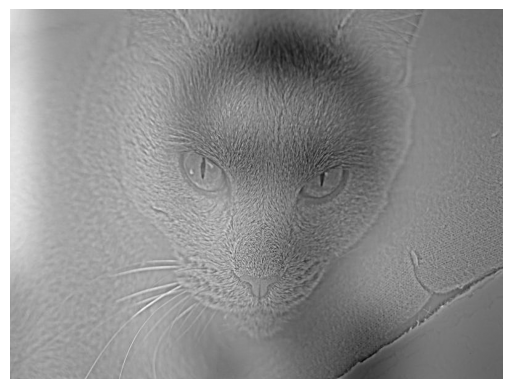

In [10]:
sigma_low = 30
sigma_high = 3

im_hybrid = hybridImage(im1, im4, sigma_low, sigma_high)
cropped_object = utils.interactive_crop(im_hybrid)

My final hybrid image here is between one of my cats and myself. Standing far away shows a man (me) and up close shows my cat.

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

In [47]:
print("Min pixel value:", contrast.min())
print("Max pixel value:", contrast.max())
contrast_rescaled = (contrast * 255).astype('uint8')

Min pixel value: 0.0
Max pixel value: 1.0


In [48]:
contrast_rescaled = np.rot90(contrast_rescaled, k=-1) 

In [49]:
contrast_rescaled = contrast_rescaled.astype('uint8')
print(contrast_rescaled.shape)  # Check the dimensions
print(contrast_rescaled.dtype)  # Check the data type

(800, 600)
uint8


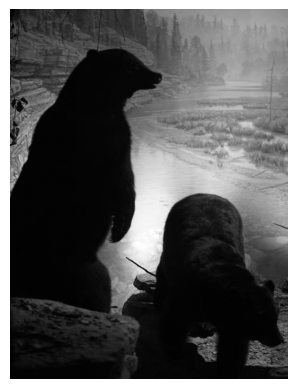

In [50]:
# want an image where we would like to see something a little better. I cannot really see the bear all too well, their faces
# specifically
plt.imshow(contrast_rescaled, cmap='gray')
plt.axis('off')
plt.show()

I want to first try to use histogram equalization in this image, because I thought it was quite intuitive in the lectures and want to see if it helps this image.

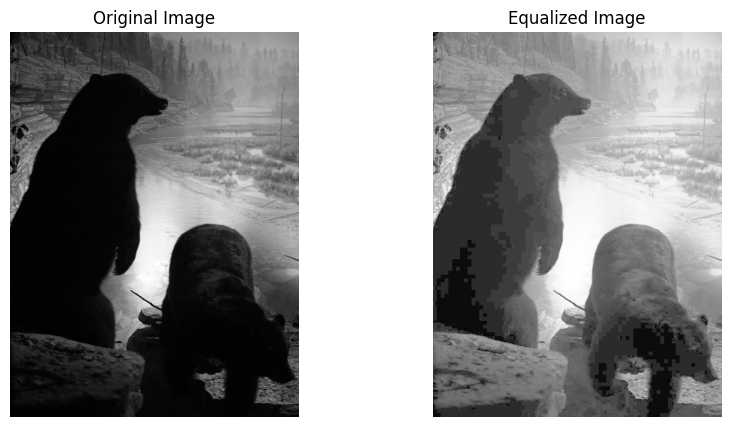

In [51]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(contrast_rescaled)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(contrast_rescaled, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

We see these blocky artifacts remaining. I think these can be removed by instead doing adaptive hisogram equalization. 

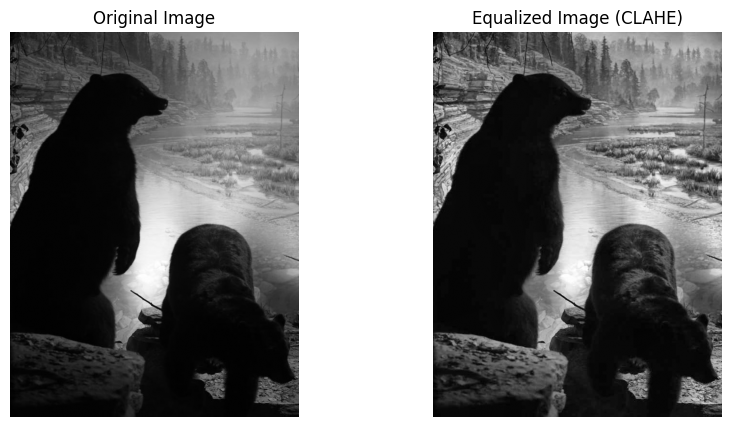

In [52]:
# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Adjust parameters as needed
equalized_image = clahe.apply(contrast_rescaled)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(contrast_rescaled, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image (CLAHE)')
plt.axis('off')

plt.show()

This is much nicer. I can actually see detail in the faces of the bears now, including their eyes, and the back of the bear on the right looks much better after enhancing the contrast.

#### Color enhancement 

It came to my attention that cv2 saves images in "bgr" instead of "rgb".

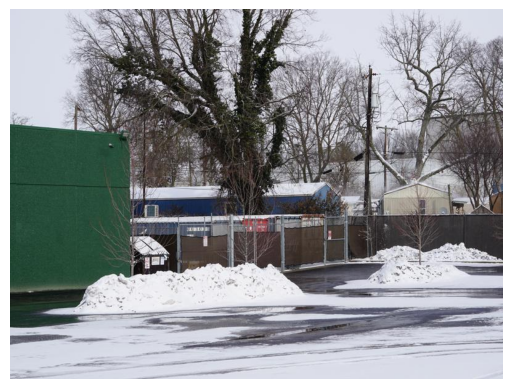

In [5]:
# Convert from BGR to RGB for display
enhance_rgb = cv2.cvtColor(enhance, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(enhance_rgb)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07254889..1.0].


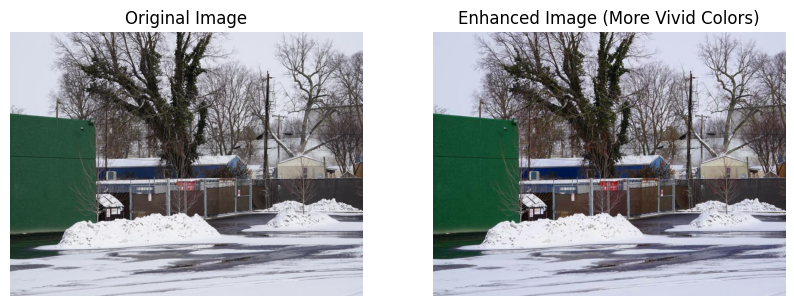

In [7]:
# Convert the image to HSV color space
enhance_hsv = cv2.cvtColor(enhance_rgb, cv2.COLOR_RGB2HSV)

# Split the HSV image into Hue, Saturation, and Value channels
h, s, v = cv2.split(enhance_hsv)

# Increase the Saturation channel (e.g., multiply by a factor > 1)
saturation_factor = 1.5  # Adjust this value to control the vividness
s = np.clip(s * saturation_factor, 0, 255).astype('float32')  # Ensure values stay within [0, 255]

# Merge the channels back together
enhanced_hsv = cv2.merge([h, s, v])

# Convert the enhanced HSV image back to RGB
enhanced_rgb = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2RGB)

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(enhance_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_rgb)
plt.title('Enhanced Image (More Vivid Colors)')
plt.axis('off')

plt.show()

#### Color shift

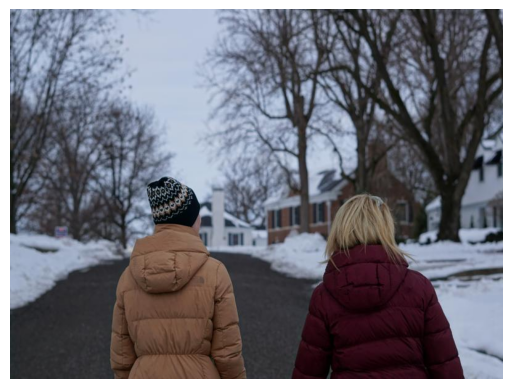

In [64]:
# maybe change the mood of the image?
shift_rgb = cv2.cvtColor(shift, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(shift_rgb)
plt.axis('off')
plt.show()


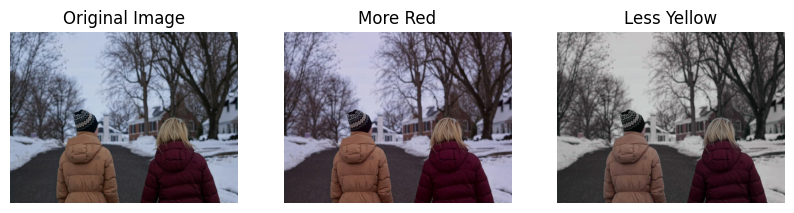

In [65]:
image = shift

# Convert the image from BGR to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

L, A, B = cv2.split(lab)

# Make the image more red
A_more_red = cv2.add(A, 5)  # using 5 as a constant
A_more_red = np.clip(A_more_red, 0, 255)  # clip to valid range (in case we go over 255)

# Make the image less yellow
B_less_yellow = cv2.subtract(B, 5)  # using 5 as a constant
B_less_yellow = np.clip(B_less_yellow, 0, 255) 

# Merge the modified channels back
lab_more_red = cv2.merge([L, A_more_red, B])
lab_less_yellow = cv2.merge([L, A, B_less_yellow])

# Convert back to BGR color space
image_more_red = cv2.cvtColor(lab_more_red, cv2.COLOR_Lab2BGR)
image_less_yellow = cv2.cvtColor(lab_less_yellow, cv2.COLOR_Lab2BGR)

# Display ...
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_more_red, cv2.COLOR_BGR2RGB))
plt.title("More Red")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_less_yellow, cv2.COLOR_BGR2RGB))
plt.title("Less Yellow")
plt.axis('off')

plt.show()